#School Provide the Following Study Help

##Lİbraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Edit Data

In [ ]:
data = pd.read_csv('pisa_data.csv')

In [ ]:
data.head()

,CNTSCHID,LANGTEST,SC001Q01TA,SC013Q01TA,SC016Q01TA,SC016Q02TA,SC016Q03TA,SC016Q04TA,SC017Q01NA,SC017Q02NA,SC017Q03NA,SC017Q04NA,SC017Q05NA,SC017Q06NA,SC017Q07NA,SC017Q08NA,SC161Q01SA,SC161Q02SA,SC161Q03SA,SC161Q04SA,SC161Q05SA,SC162Q01SA,SC155Q01HA,SC155Q02HA,SC155Q03HA,SC155Q04HA,SC155Q05HA,SC155Q06HA,SC155Q07HA,SC155Q08HA,SC155Q09HA,SC155Q10HA,SC155Q11HA,SC156Q01HA,SC156Q02HA,SC156Q03HA,SC156Q04HA,SC156Q05HA,SC156Q06HA,SC156Q07HA,...,SC053Q16IA,SC053D11TA,SC150Q01IA,SC150Q02IA,SC150Q03IA,SC150Q04IA,SC150Q05IA,SC164Q01HA,SC064Q01TA,SC064Q02TA,SC064Q03TA,SC064Q04NA,SC152Q01HA,SC160Q01WA,SC052Q01NA,SC052Q02NA,SC052Q03HA,PRIVATESCH,SCHLTYPE,STRATIO,SCHSIZE,RATCMP1,RATCMP2,TOTAT,PROATCE,PROAT5AB,PROAT5AM,PROAT6,CLSIZE,CREACTIV,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,Country,Score
0,800002,140.0,1.0,1.0,95.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,8002,2.0,2.0,2.0,2.0,2.0,0.0,70.0,70.0,100.0,0.0,2.0,NaN,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,0.0000,26.0,0.0000,0.0000,0.1154,0.0,18.0,1.0,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,Albania,419.7
1,800003,140.0,1.0,1.0,NaN,NaN,100.0,NaN,1.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,8002,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,public,3.0,NaN,NaN,NaN,NaN,6.0,1.0000,0.3333,0.3333,0.0,13.0,1.0,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,Albania,419.7
2,800004,140.0,1.0,1.0,100.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,8002,1.0,1.0,1.0,1.0,1.0,1.0,62.0,80.0,60.0,90.0,1.0,1.0,1.0,1.0,1.0,public,3.0,9.7619,205.0,0.0000,NaN,21.0,1.0000,0.5238,0.4762,0.0,18.0,2.0,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,Albania,419.7
3,800005,140.0,2.0,1.0,100.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,1.0,65.0,60.0,58.0,55.0,1.0,3.0,2.0,1.0,1.0,public,3.0,NaN,NaN,NaN,0.3333,34.5,0.6087,0.3623,0.6377,0.0,23.0,1.0,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,Albania,419.7
4,800006,140.0,2.0,1.0,100.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,3.0,4.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8001,2.0,2.0,2.0,2.0,2.0,NaN,97.0,97.0,99.0,2.0,1.0,3.0,2.0,2.0,1.0,public,3.0,18.0000,315.0,0.0256,1.0000,17.5,1.0000,0.0000,0.1714,0.0,38.0,3.0,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,Albania,419.7


In [ ]:
columns = ['SC052Q01NA',"SC052Q02NA","SC052Q03HA",'Score','Country']

df = data[columns]
#selected the columns that I would like to process and deleted the other columns in the dataset that were confusing.

##Rename Columns Name & Change Rows 

In [ ]:
df.rename(columns ={'SC052Q01NA':'Rooms',"SC052Q02NA":"Staff","SC052Q03HA":"Peer to Peer"},inplace=True)
#rename columns for better show.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rows_change = ["Rooms","Staff","Peer to Peer"]
for i in rows_change:
  df[i][df[i] == 2.0] = 0.0
#1.0 yes 
#0.0 no  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

##Room(s) where the students can do their homework

In [ ]:
sum = df.groupby(['Country'])[['Rooms','Peer to Peer','Staff']].sum()
sum1 = df.groupby(['Country'])[['Score']].mean()
###we accept the highest scorer as the country with the most rooms, staff or peer to peer.
###If is high, we can say that the quality of the school is good, but we also need to look at the score.
sum =sum.reset_index()
sum1=sum1.reset_index()

In [ ]:
concatenated = sum.merge(sum1)

In [ ]:
concatenated.corr()
#I looked at their relationship with the score.

,Rooms,Peer to Peer,Staff,Score
Rooms,1.000000,0.660811,0.834437,0.274358
Peer to Peer,0.660811,1.000000,0.798972,-0.077722
Staff,0.834437,0.798972,1.000000,0.206165
Score,0.274358,-0.077722,0.206165,1.000000


In [ ]:
concatenated.head()

,Country,Rooms,Peer to Peer,Staff,Score
0,Albania,89.0,258.0,182.0,419.7
1,Argentina,158.0,330.0,225.0,395.0
2,Australia,578.0,279.0,631.0,499.0
3,Austria,223.0,104.0,105.0,491.0
4,B-S-J-Z (China),192.0,335.0,254.0,578.7


###Despite the fact that China is the most successful country, the number of private study rooms provided by the school is small.

###Best 10 Country For Rooms

In [ ]:
best_10_scores_rooms = concatenated.nlargest(10,"Rooms")

In [ ]:
best_10_scores_rooms
##Top 10 countries with the highest number of private rooms where students can do their homework.

,Country,Rooms,Peer to Peer,Staff,Score
68,Spain,774.0,390.0,447.0,483.0
12,Canada,715.0,528.0,709.0,516.7
2,Australia,578.0,279.0,631.0,499.0
76,United Kingdom,358.0,227.0,346.0,503.7
36,Kazakhstan,328.0,555.0,555.0,402.3
67,South Korea,322.0,262.0,128.0,519.7
40,Lithuania,300.0,230.0,303.0,479.7
66,Slovenia,288.0,167.0,175.0,503.7
33,Italy,280.0,301.0,240.0,477.0
9,Brazil,266.0,181.0,74.0,400.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


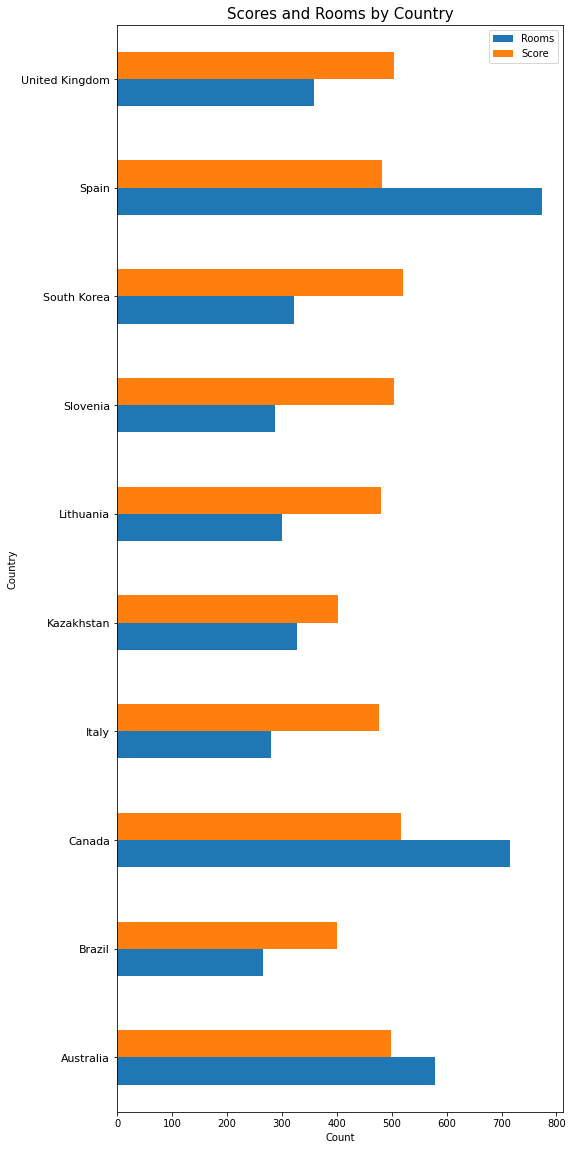

In [ ]:
best_10_scores_rooms.groupby('Country')['Rooms','Score'].mean().plot(kind ="barh",figsize=(8,20))
plt.yticks(size = 11)
plt.xlabel("Count",size = 10)
plt.ylabel("Country",size = 10)
plt.title("Scores and Rooms by Country",size = 15)
plt.show()
#room sayısı vs score.


###1.When we look at the total scores of countries with more than 500  rooms, we observe that it is higher than 450. This can actually be a factor for success. However, the fact that countries such as China or Singapore are not included here suggests that it is not a feature that directly affects success.
###2.We saw that the country with the most rooms is Spain. Maybe having these rooms may have increased the success of Spain, but when we look at the general, it is not possible to make such an inference.

##Staff help with homework

In [ ]:
best_10_scores_staff = concatenated.nlargest(10,"Staff")
#Top 10 countries Staff help with homework

In [ ]:
best_10_scores_staff

,Country,Rooms,Peer to Peer,Staff,Score
12,Canada,715.0,528.0,709.0,516.7
2,Australia,578.0,279.0,631.0,499.0
36,Kazakhstan,328.0,555.0,555.0,402.3
68,Spain,774.0,390.0,447.0,483.0
75,United Arab Emirates,249.0,359.0,406.0,433.7
76,United Kingdom,358.0,227.0,346.0,503.7
61,Russian Federation,242.0,352.0,318.0,481.7
40,Lithuania,300.0,230.0,303.0,479.7
4,B-S-J-Z (China),192.0,335.0,254.0,578.7
33,Italy,280.0,301.0,240.0,477.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


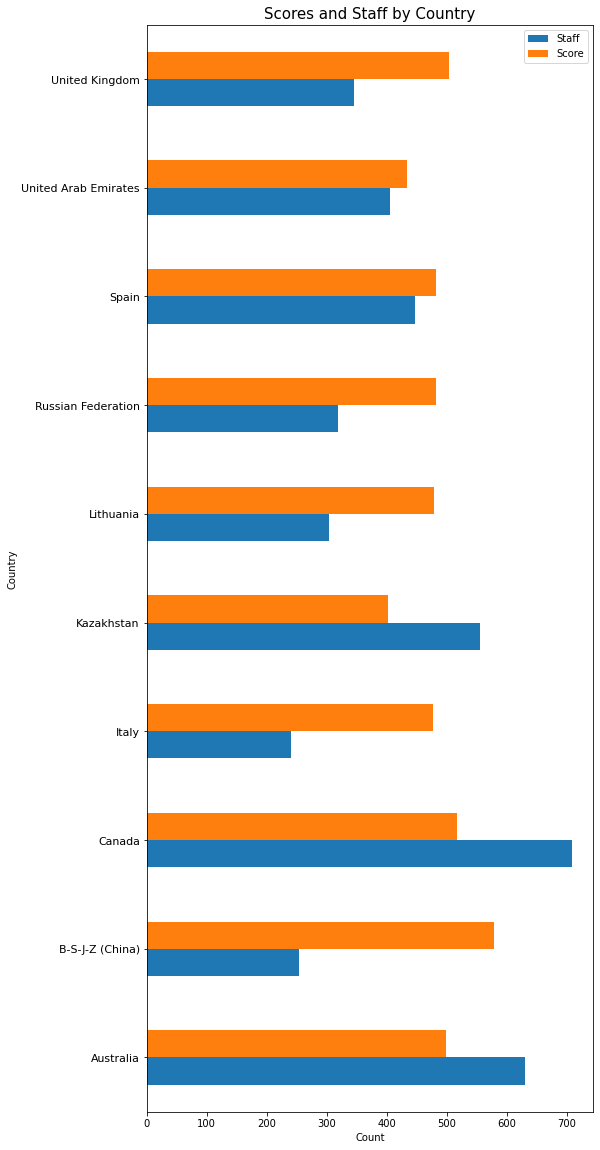

In [ ]:
best_10_scores_staff.groupby('Country')['Staff','Score'].mean().plot(kind ="barh",figsize=(8,20))
plt.yticks(size = 11)
plt.xlabel("Count",size = 10)
plt.ylabel("Country",size = 10)
plt.title("Scores and Staff by Country",size = 15)
plt.show()

##Peer to Peer Tutoring

In [ ]:
best_10_scores_p2p = concatenated.nlargest(10,"Peer to Peer")


In [ ]:
best_10_scores_p2p

,Country,Rooms,Peer to Peer,Staff,Score
36,Kazakhstan,328.0,555.0,555.0,402.3
12,Canada,715.0,528.0,709.0,516.7
68,Spain,774.0,390.0,447.0,483.0
75,United Arab Emirates,249.0,359.0,406.0,433.7
61,Russian Federation,242.0,352.0,318.0,481.7
4,B-S-J-Z (China),192.0,335.0,254.0,578.7
1,Argentina,158.0,330.0,225.0,395.0
33,Italy,280.0,301.0,240.0,477.0
2,Australia,578.0,279.0,631.0,499.0
72,Thailand,228.0,277.0,208.0,412.7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


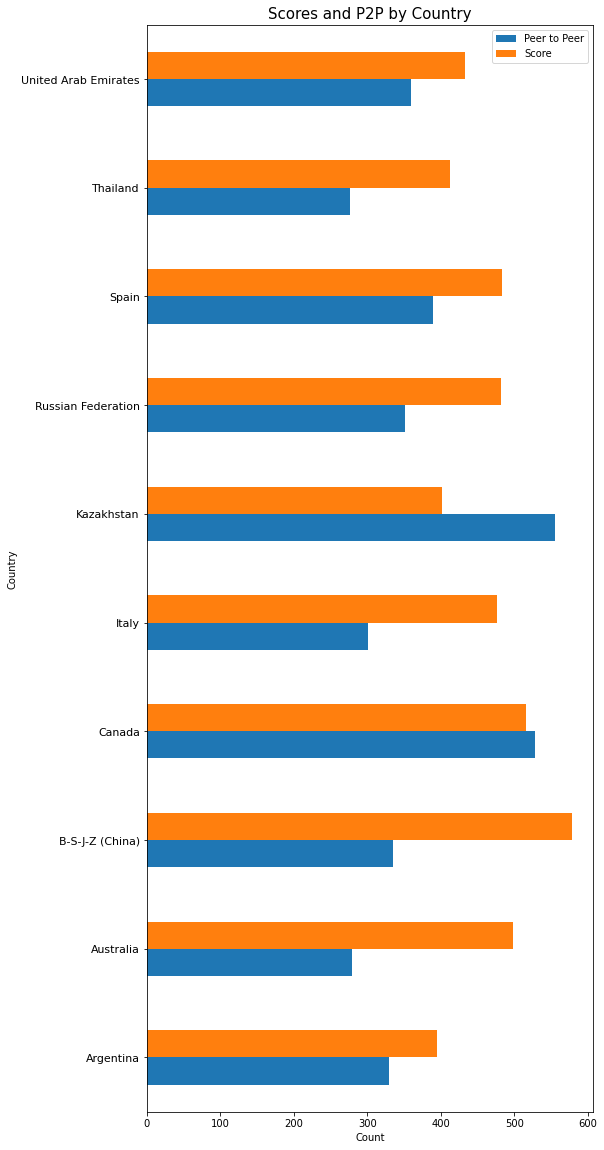

In [ ]:
best_10_scores_p2p.groupby('Country')['Peer to Peer','Score'].mean().plot(kind ="barh",figsize=(8,20))
plt.yticks(size = 11)
plt.xlabel("Count",size = 10)
plt.ylabel("Country",size = 10)
plt.title("Scores and P2P by Country",size = 15)
plt.show()


##All Together -FINAL

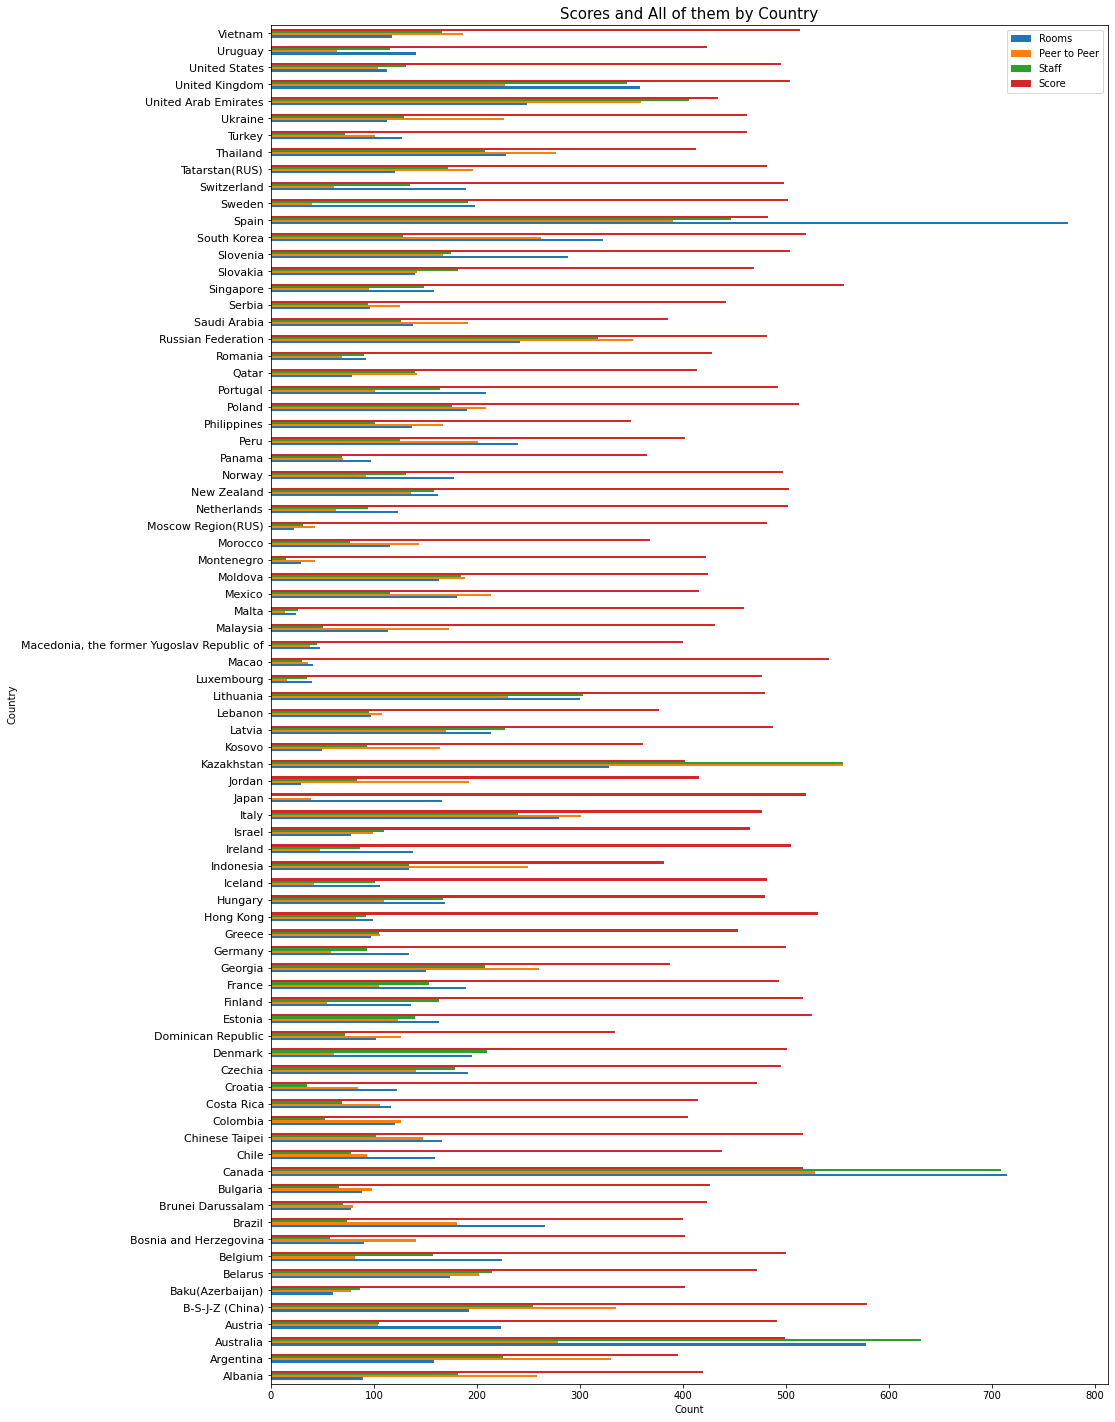

In [ ]:
concatenated.groupby('Country').mean().plot(kind ="barh",figsize=(15,25))
plt.yticks(size = 11)
plt.xlabel("Count",size = 10)
plt.ylabel("Country",size = 10)
plt.title("Scores and All of them by Country",size = 15)
plt.show()


###In this image, we viewed all OECD countries and observed the room, staff, p2p and score points of each country. What draws our attention is the fact that the number of rooms and staff in Canada is really high compared to other countries. We can say that schools in Canada give importance to such features. Another country that draws our attention is the fact that the number of such features in the schools of Macao, which has a very high success rate, is very low.